In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("agri_data.csv", parse_dates=['ts'])

print("Total Rows:", len(df))
df.head()


Total Rows: 1136


,sensor_id,ts,soil_moisture,temperature,humidity,rainfall,irrigation_needed
0,sensor_2,2025-11-30 17:38:48.691305,58.469053,28.4,51.8,0.81,False
1,sensor_3,2025-11-30 17:38:48.691966,45.733436,25.5,60.0,0.76,False
2,sensor_1,2025-11-30 17:38:48.698401,30.541915,25.7,54.4,0.31,False
3,sensor_1,2025-11-30 17:38:49.334780,25.478822,25.7,42.3,0.52,False
4,sensor_3,2025-11-30 17:38:49.355946,37.663728,28.5,57.7,1.18,False


In [4]:
df['irrigation_needed'].value_counts()


irrigation_needed
False    929
True     207
Name: count, dtype: int64

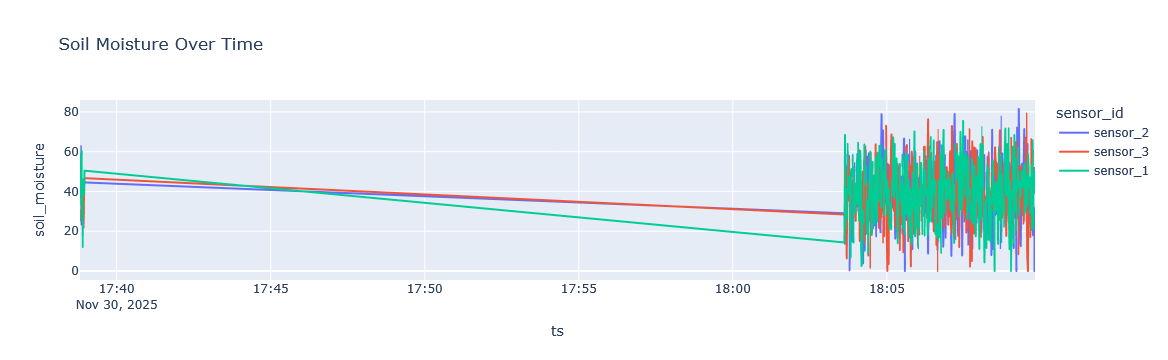

In [5]:
import plotly.express as px

df_sorted = df.sort_values('ts')

fig = px.line(
    df_sorted,
    x='ts',
    y='soil_moisture',
    color='sensor_id',
    title='Soil Moisture Over Time'
)
fig.show()


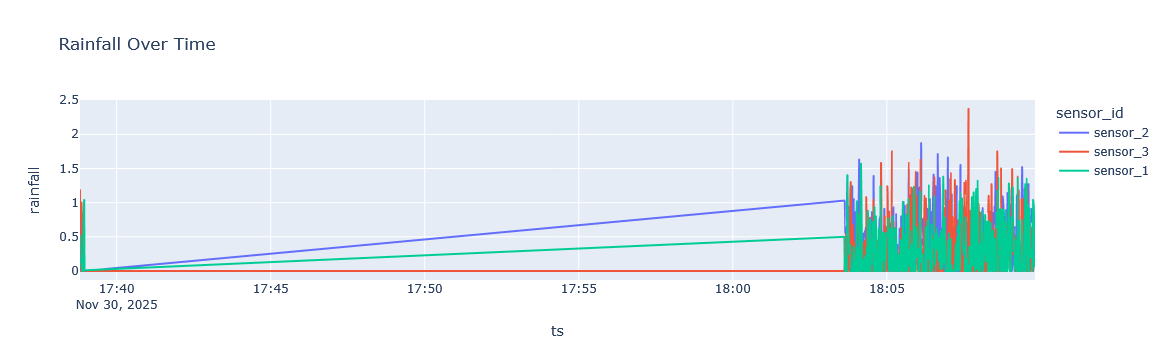

In [6]:
fig = px.line(df_sorted, x='ts', y='rainfall', color='sensor_id',
              title='Rainfall Over Time')
fig.show()


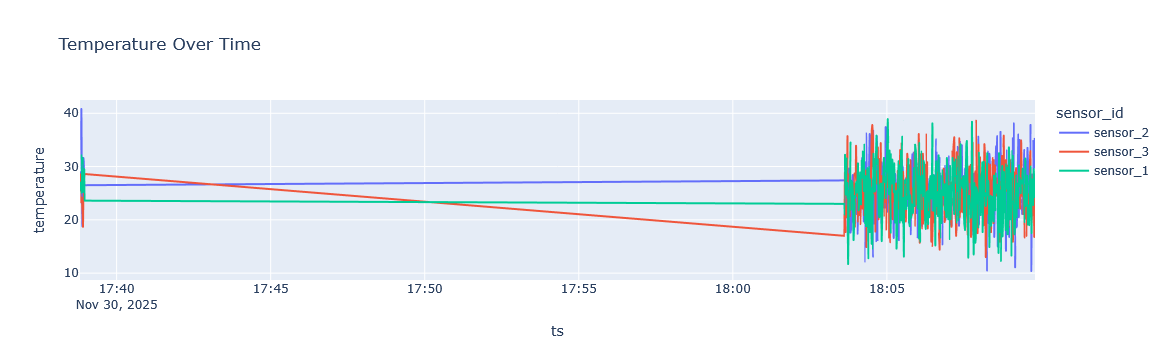

In [7]:
fig = px.line(df_sorted, x='ts', y='temperature', color='sensor_id',
              title='Temperature Over Time')
fig.show()


In [8]:
# Features and Labels
X = df[['soil_moisture', 'temperature', 'humidity', 'rainfall']].astype(float)
y = df['irrigation_needed'].astype(int)

from sklearn.model_selection import train_test_split

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 908
Test size: 228


In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

pred = model.predict(X_test)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("\nClassification Report:")
print(classification_report(y_test, pred))


Confusion Matrix:
[[186   0]
 [  2  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       186
           1       1.00      0.95      0.98        42

    accuracy                           0.99       228
   macro avg       0.99      0.98      0.99       228
weighted avg       0.99      0.99      0.99       228



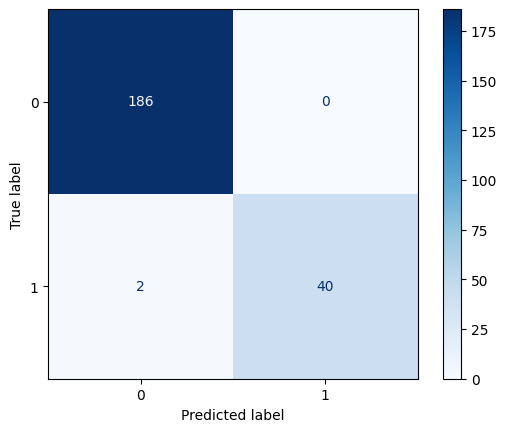

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()


In [13]:
import joblib
joblib.dump(model, "irrigation_model.joblib")
print("Saved irrigation_model.joblib")


Saved irrigation_model.joblib


In [14]:
sample = pd.DataFrame([{
    "soil_moisture": 25,
    "temperature": 28,
    "humidity": 60,
    "rainfall": 0.1
}])

print("Prediction:", model.predict(sample))
print("Probability:", model.predict_proba(sample))


Prediction: [1]
Probability: [[0. 1.]]
